!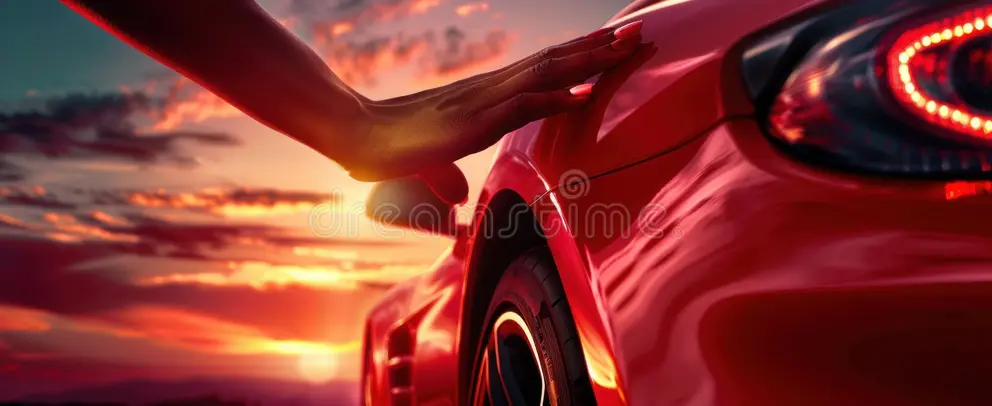

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# 1.EDA ANALYSIS

Initial Data Understanding
* Data Loading and Inspection
* Data Types
* Missing Values
* Duplicates

In [3]:
df = pd.read_csv("/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv", delimiter=",")

df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [5]:
df.shape



(19237, 18)

In [6]:

# Check Missing Values
df.isna().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [7]:
# Check Duplicates
df.duplicated().sum()

313

In [8]:
# Precentage of Duplicates
df.duplicated().sum() * 100 / len(df)

1.6270728284035971

In [9]:
df.drop_duplicates(inplace=True)

# 2. Basic Statistical Overview¶ Summary Statistics (describe(), value_counts()) Zero and Constant Values

* Summary statistic
* Zero and Constant Values


In [10]:
# Summary [Descriptive] Statistics for Numerical Columns
df.describe(include="number")

,ID,Price,Prod. year,Cylinders,Airbags
count,1.892400e+04,1.892400e+04,18924.000000,18924.000000,18924.000000
mean,4.557538e+07,1.858744e+04,2010.914236,4.580216,6.568379
std,9.375468e+05,1.921356e+05,5.665749,1.200223,4.322323
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569501e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577191e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580174e+07,2.206300e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [11]:
# Summary [Descriptive] Statistics for Categorical Columns
df.describe(include="object")

,Levy,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
count,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924,18924
unique,559,65,1590,11,2,7,107,7687,4,3,3,2,16
top,-,HYUNDAI,Prius,Sedan,Yes,Petrol,2,0 km,Automatic,Front,04-May,Left wheel,Black
freq,5709,3729,1069,8600,13731,9944,3856,714,13282,12695,18032,17471,4944


In [12]:
numerical_cols = list(df.select_dtypes(include="number").columns)
categorical_cols = list(df.select_dtypes(exclude="number").columns)

print(numerical_cols)
print(categorical_cols)

['ID', 'Price', 'Prod. year', 'Cylinders', 'Airbags']
['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']


In [13]:
def display_values(col):
    print("Value Counts for Column", col)
    print(df[col].value_counts())
    print("="*50)
    print("Unique Values and Length of it:")
    print(df[col].unique())
    print(df[col].nunique())

In [14]:
for col in categorical_cols:
    display_values(col)
    print("*"*50)

Value Counts for Column Levy
Levy
-       5709
765      482
891      453
639      403
640      398
        ... 
3156       1
2908       1
1279       1
1719       1
1901       1
Name: count, Length: 559, dtype: int64
Unique Values and Length of it:
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798' '1277' '442' '1051'

In [15]:
# Replace Value (-) in Levy Column with 0
df["Levy"] = df["Levy"].replace("-", 0)

# Convert it into Numeric Type
df["Levy"] = pd.to_numeric(df["Levy"])
df["Mileage"] = df["Mileage"].str.split(" ").str[0]

df["Mileage"] = pd.to_numeric(df["Mileage"])
df["Doors"]  # Ambiguous Values -> Drop it

df.drop("Doors", axis=1, inplace=True)
df["Engine volume"] = df["Engine volume"].str.split().str[0]

df["Engine volume"] = pd.to_numeric(df["Engine volume"])

# 3. Distribution of Variables

* Numerical Features (Histograms, KDE)
* Categorical Features (Bar Plot, Check Imbalance)
* Outlier Detection

In [16]:
numerical_cols = list(df.select_dtypes(include="number").columns)
categorical_cols = list(df.select_dtypes(exclude="number").columns)

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


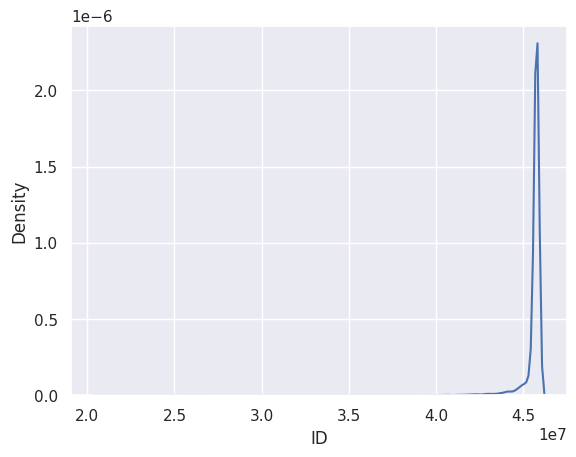

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


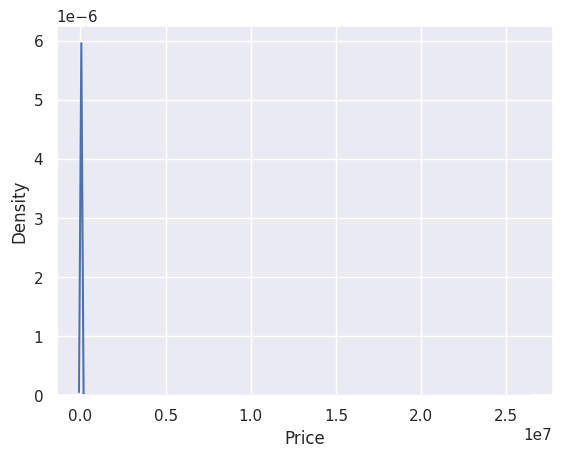

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


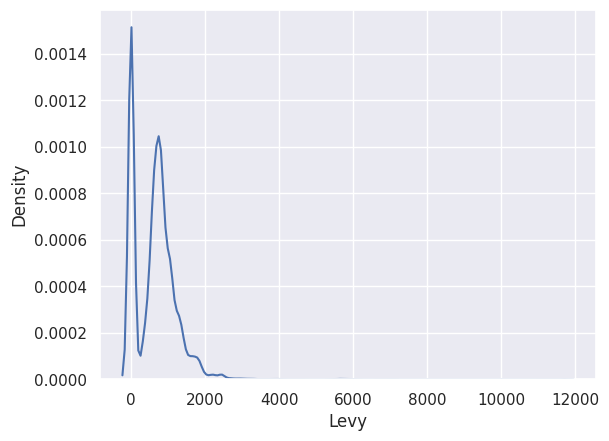

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


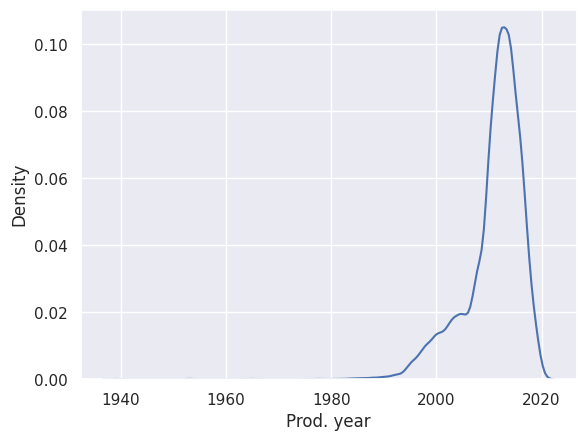

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


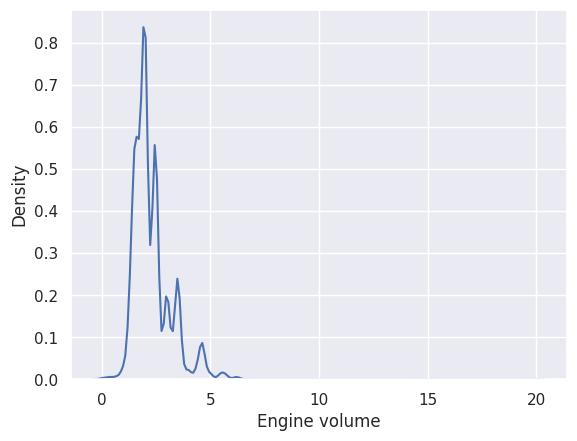

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


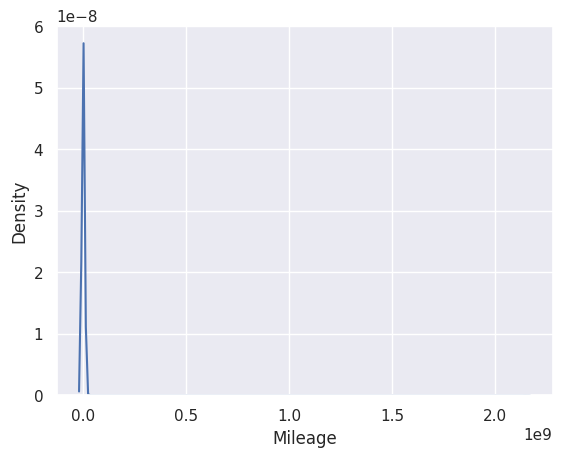

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


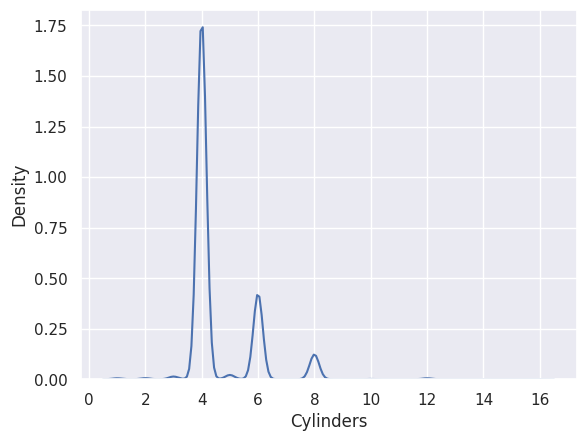

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


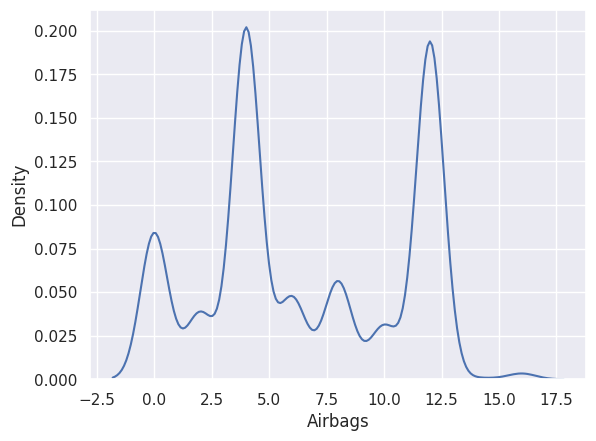

In [17]:
for col in numerical_cols:
    sns.kdeplot(df[col])
    plt.show()

# 4. Correlation¶

* Numerical Correlations
* Categotical Correlations

<Axes: >

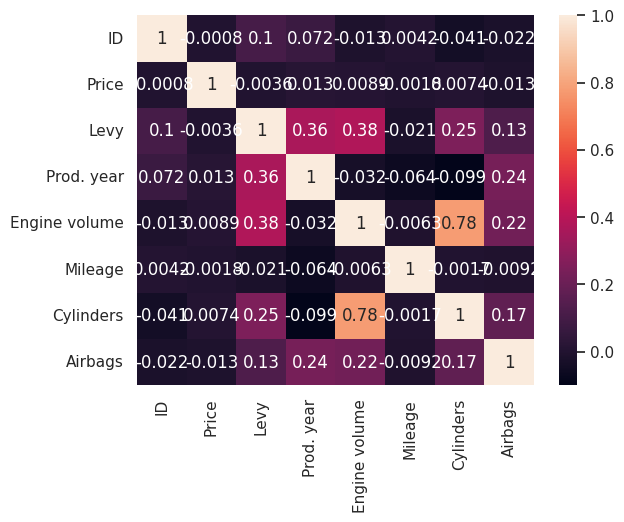

In [18]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

# 5. Feature Interactions

* Scatter Plot
* Box Plot

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

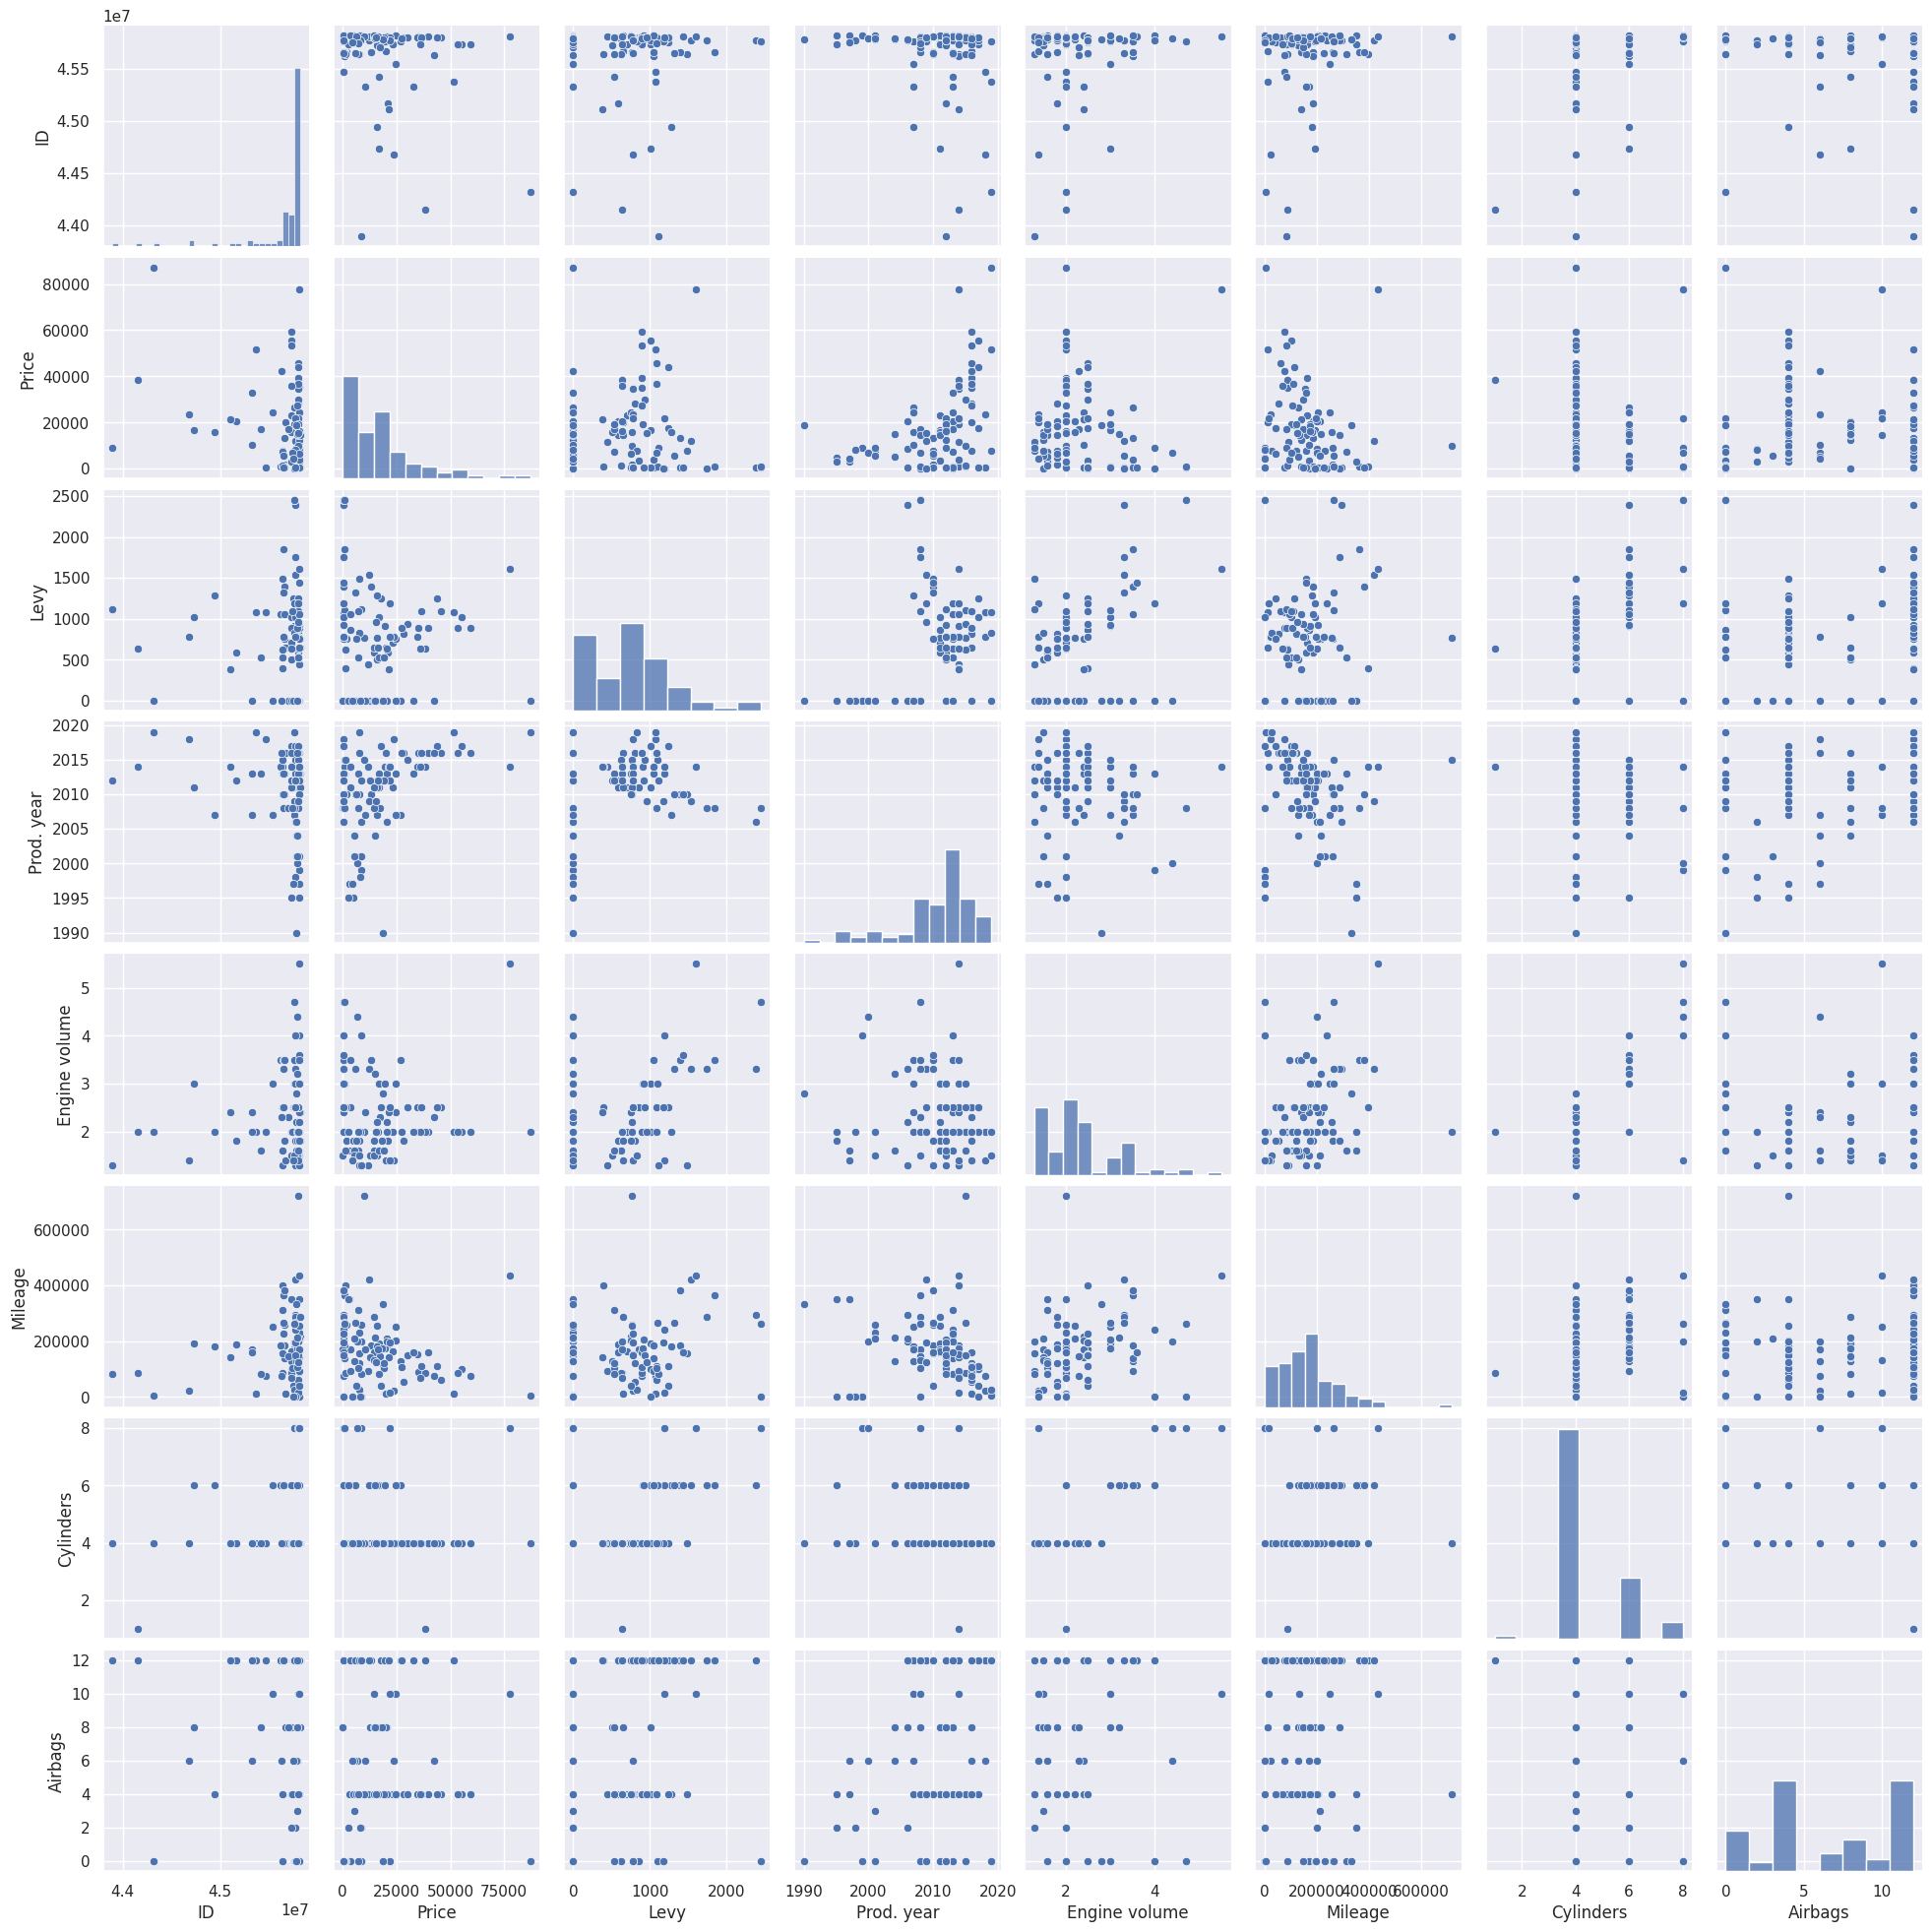

In [19]:
sns.pairplot(df[:100])

ID


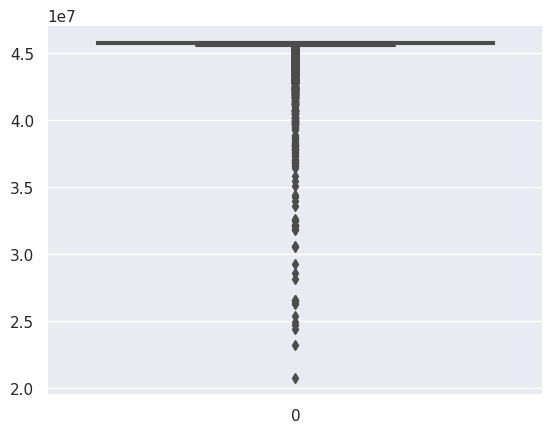

Price


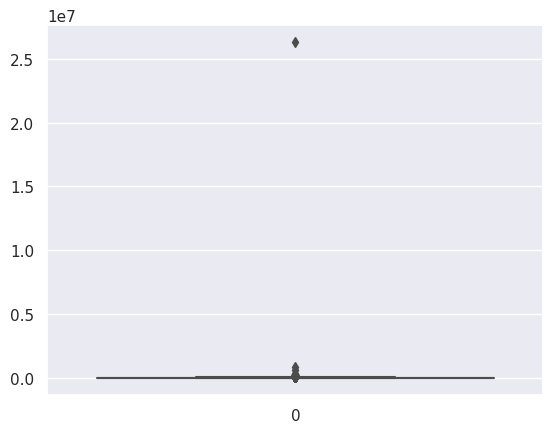

Levy


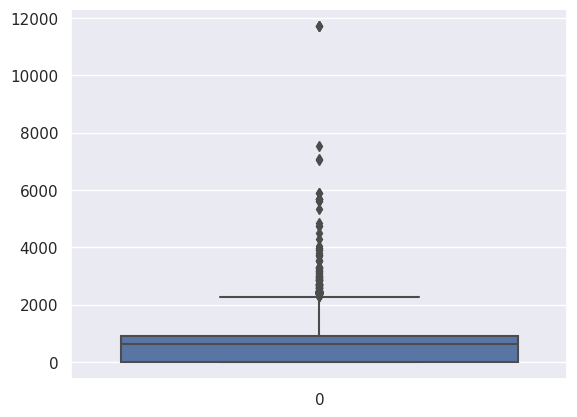

Prod. year


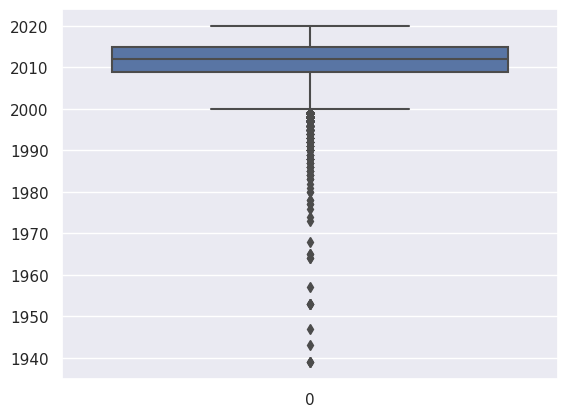

Engine volume


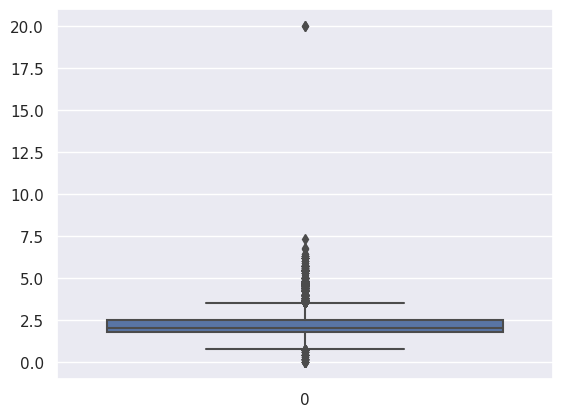

Mileage


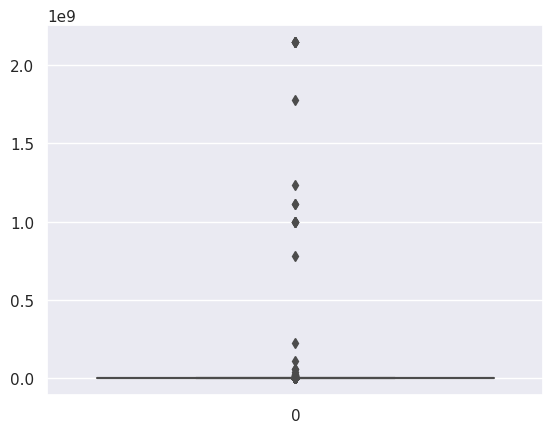

Cylinders


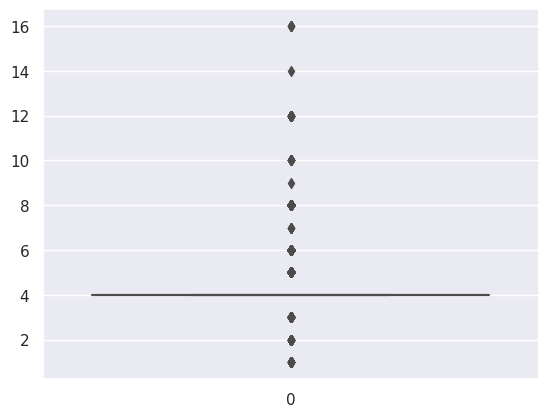

Airbags


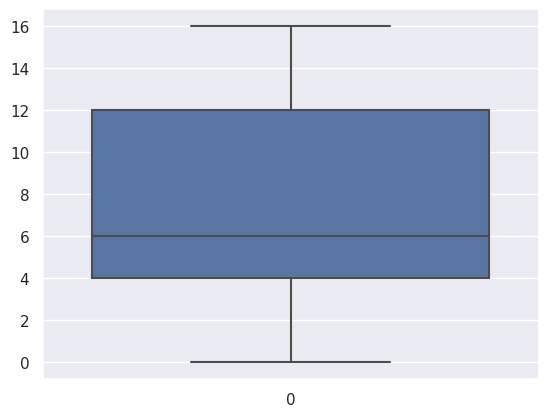

In [20]:
for col in numerical_cols:
    print(f"{col}")
    sns.boxplot(df[col])
    plt.show()

In [21]:
df[df["Price"] > 5e5]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,Airbags
1225,45795524,627220,0,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,Yes,Petrol,6.3,0,8.0,Tiptronic,4x4,Left wheel,Black,12
8541,45761204,872946,2067,LAMBORGHINI,Urus,2019,Universal,Yes,Petrol,4.0,2531,8.0,Tiptronic,4x4,Left wheel,Black,0
16983,45812886,26307500,0,OPEL,Combo,1999,Goods wagon,No,Diesel,1.7,99999,4.0,Manual,Front,Left wheel,Blue,0


In [22]:
def clean_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    # df[col] = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)] # Remove Outliers
    # Replace Outliers with Upper Bound if Above Or with Lower Bound If Below
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    # df[col] = np.wher(df[col] < lower_bound, lower_bound, df[col])
    # df[col] = np.wher(df[col] > upper_bound, upper_bound, df[col])
    return df

In [23]:
for col in ["Price", "Mileage", "Levy"]:
    df = clean_outliers(df, col)

ID


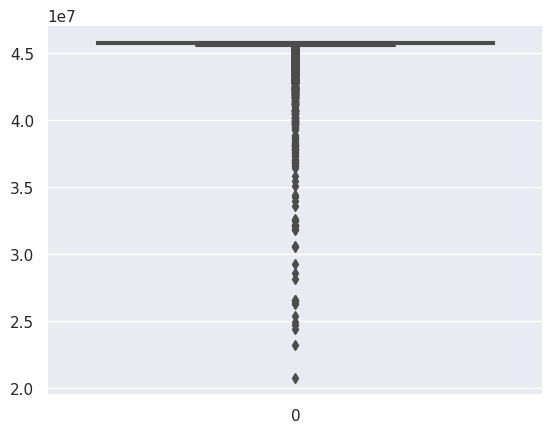

Price


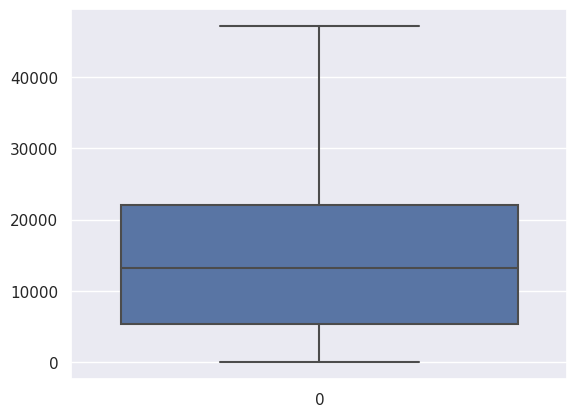

Levy


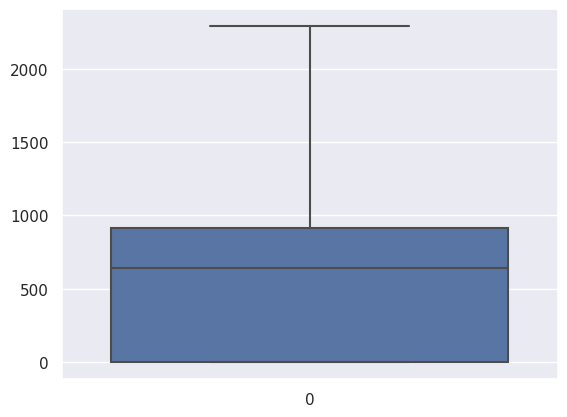

Prod. year


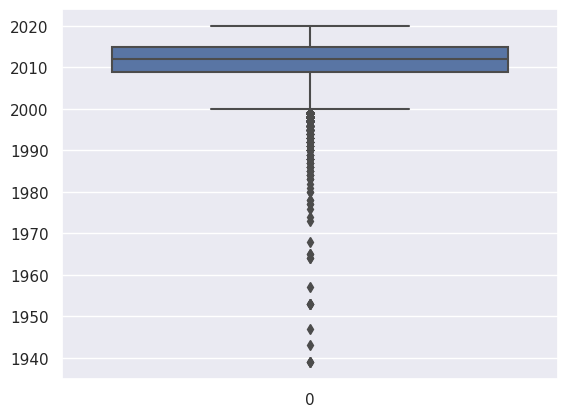

Engine volume


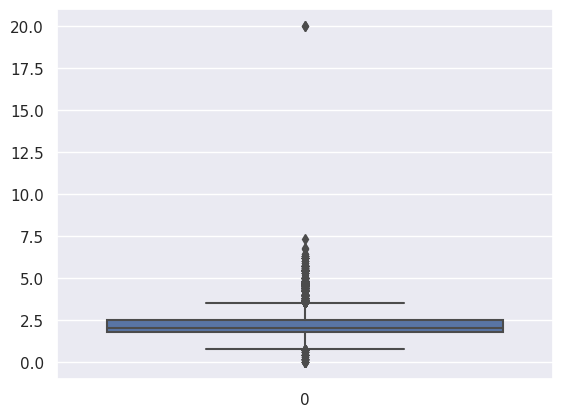

Mileage


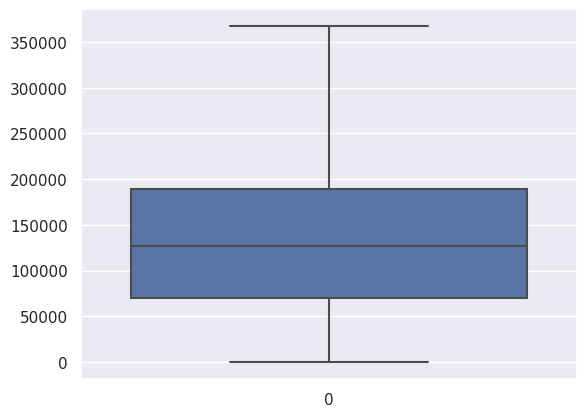

Cylinders


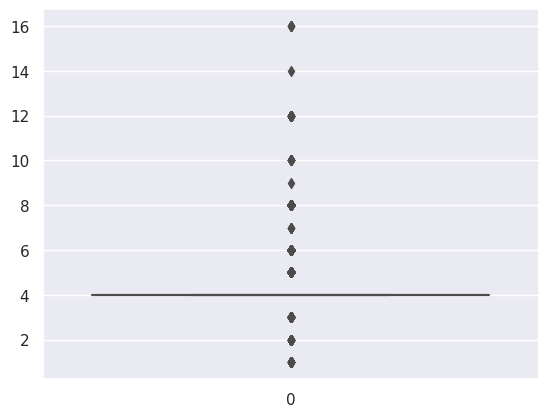

Airbags


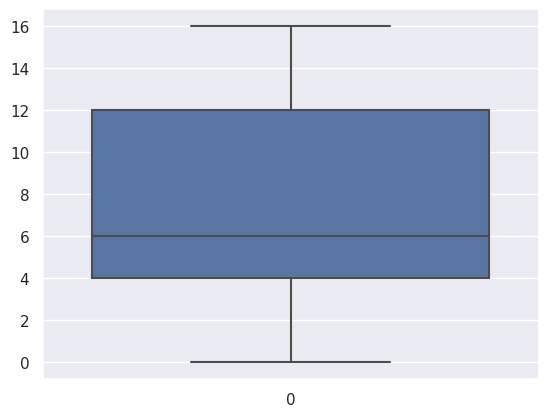

In [24]:
for col in numerical_cols:
    print(f"{col}")
    sns.boxplot(df[col])
    plt.show()

# 6. Target Variable Analysis

* Distribution of Target Variable(for class imbalance, decide if resampling or weighting is needed) -->> In Case of Classification
* Relationship between Predictors (Scatter Plot, Box Plot versus the Target)

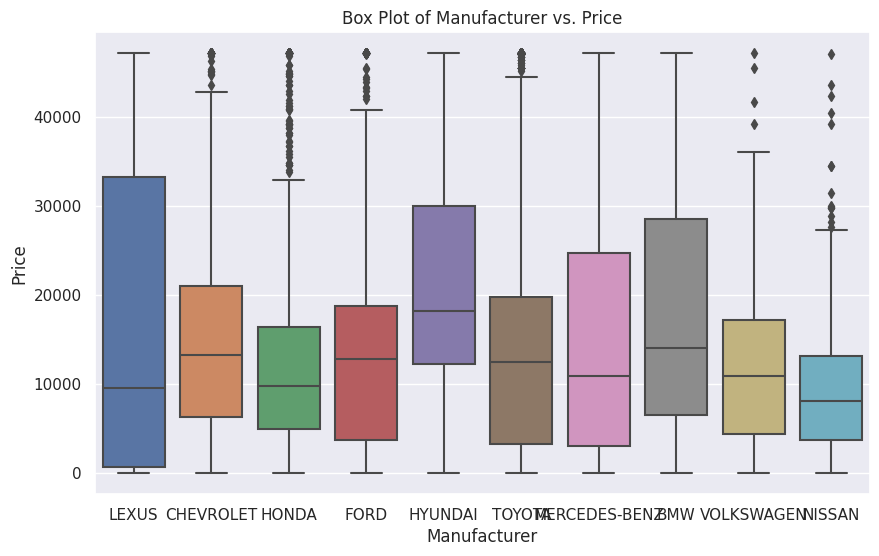

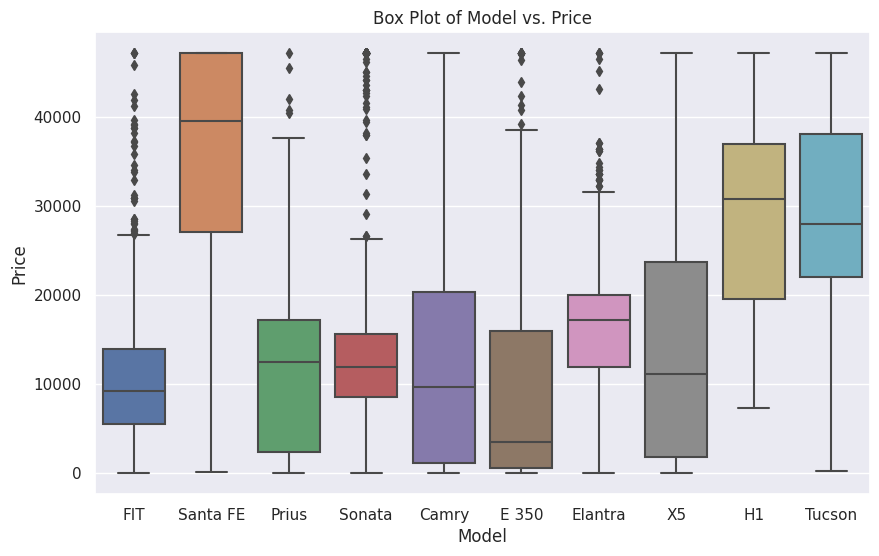

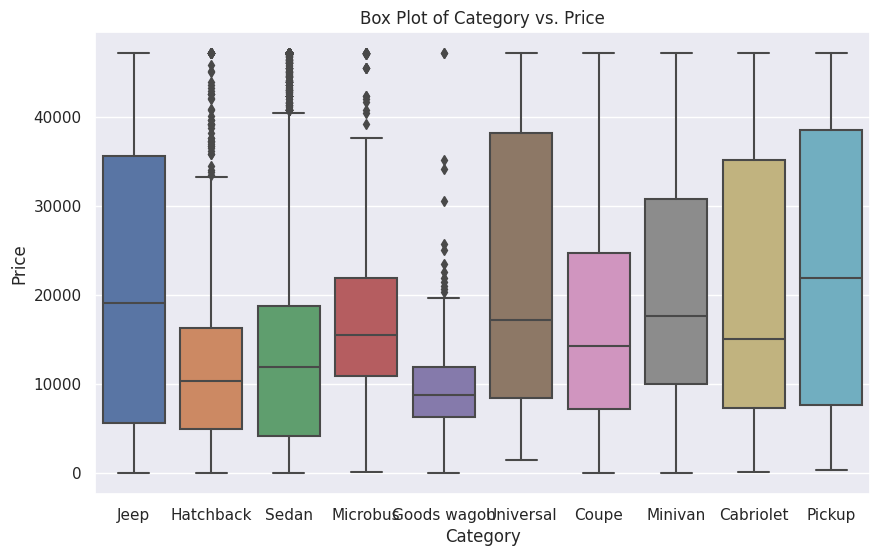

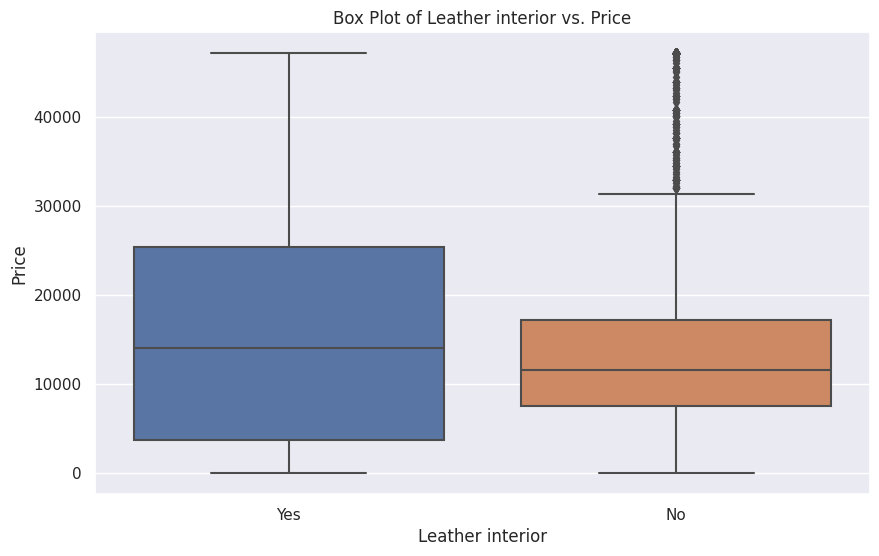

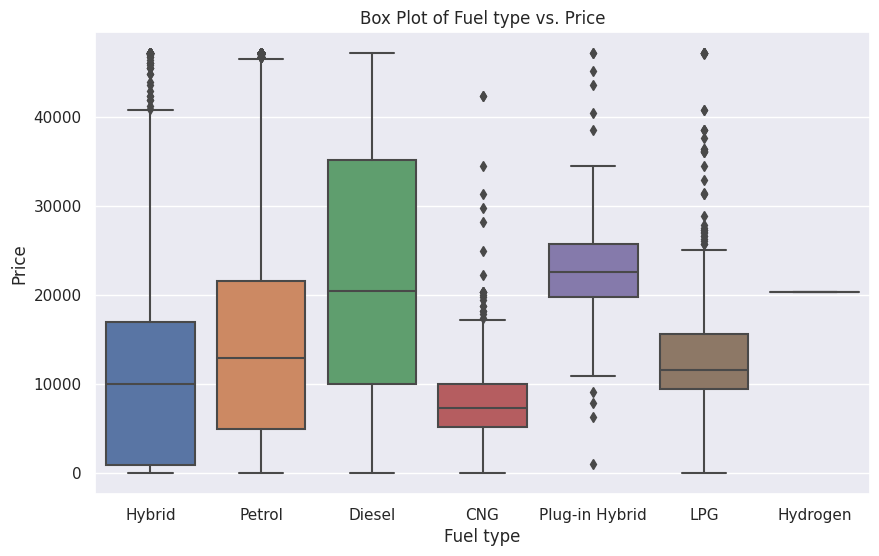

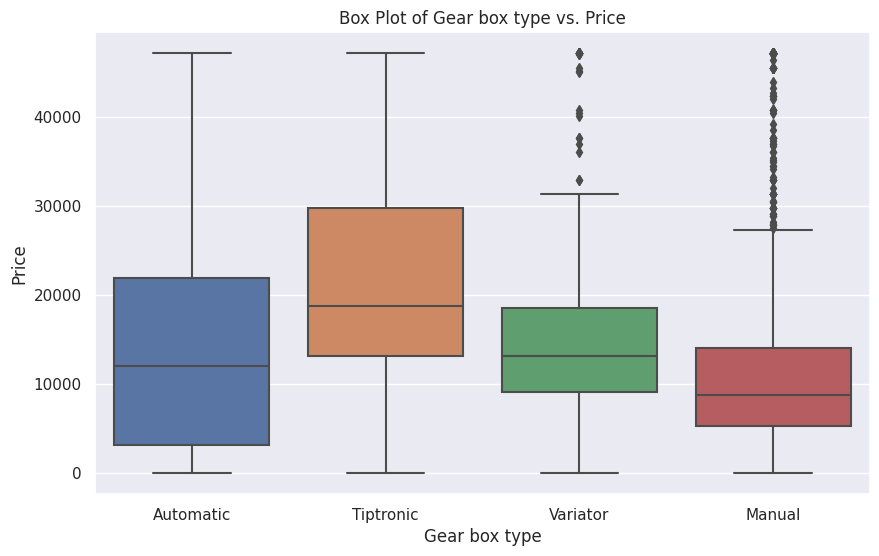

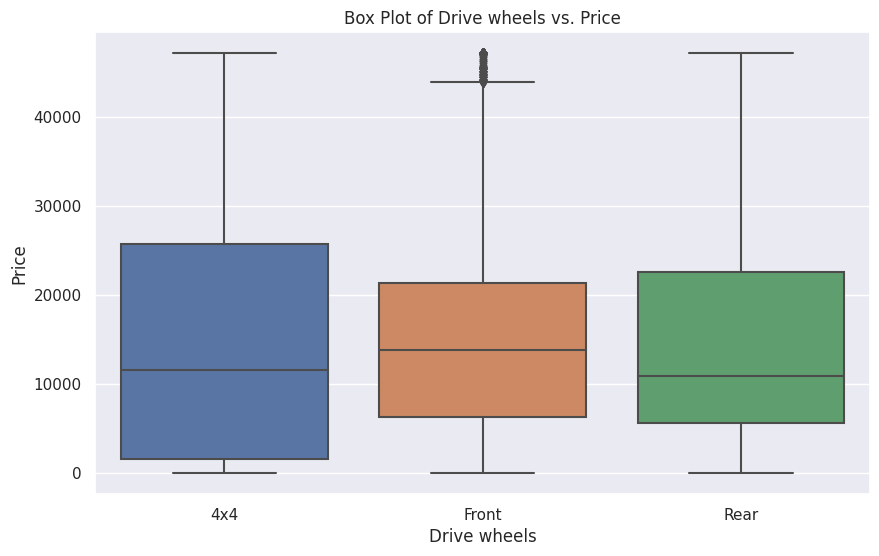

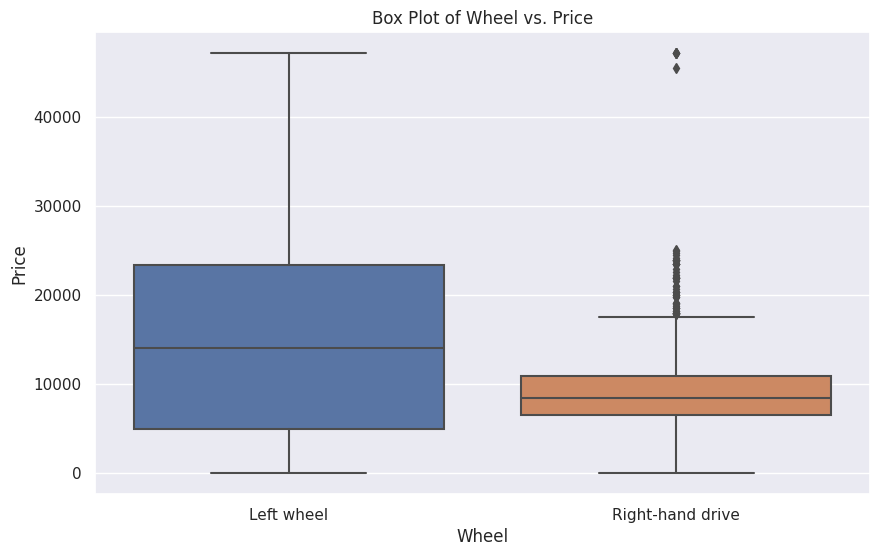

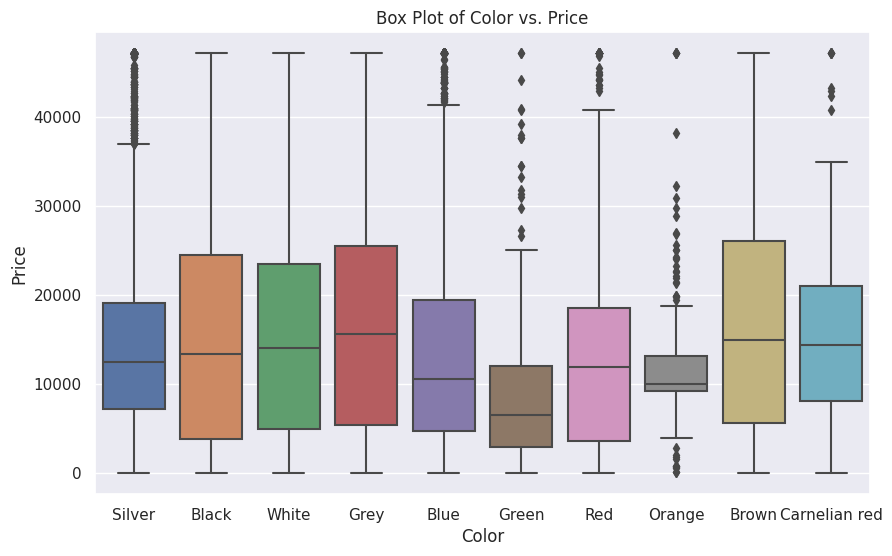

In [25]:
for col in categorical_cols:
    # Select Top 10 Categories of each Column
    top_categories = df[col].value_counts().index[:10]
    filtered_df = df[df[col].isin(top_categories)]

    plt.figure(figsize=(10, 6))
    sns.boxplot(x=filtered_df[col], y=filtered_df["Price"])
    plt.title(f"Box Plot of {col} vs. Price")

In [26]:
df["Engine volume"].unique()

array([ 3.5,  3. ,  1.3,  2.5,  2. ,  1.8,  2.4,  4. ,  1.6,  3.3,  2.2,
        4.7,  1.5,  4.4,  1.4,  3.6,  2.3,  5.5,  2.8,  3.2,  3.8,  4.6,
        1.2,  5. ,  1.7,  2.9,  0.5,  1.9,  2.7,  4.8,  5.3,  0.4,  1.1,
        2.1,  0.7,  5.4,  3.7,  1. ,  2.6,  0.8,  0.2,  5.7,  6.7,  6.2,
        3.4,  6.3,  4.3,  4.2,  0. , 20. ,  0.3,  5.9,  5.6,  6. ,  0.6,
        6.8,  4.5,  7.3,  0.1,  3.1,  6.4,  3.9,  0.9,  5.2,  5.8])

In [27]:
df["Airbags"].value_counts()

Airbags
4     5733
12    5534
0     2384
8     1569
6     1289
2     1051
10     845
5      104
16      93
7       85
1       76
9       62
3       37
11      33
14      20
15       7
13       2
Name: count, dtype: int64

In [28]:
df["Cylinders"].value_counts()

Cylinders
4.0     14159
6.0      3373
8.0       976
5.0       169
3.0       107
2.0        42
12.0       38
1.0        37
10.0       12
16.0        5
7.0         4
9.0         1
14.0        1
Name: count, dtype: int64

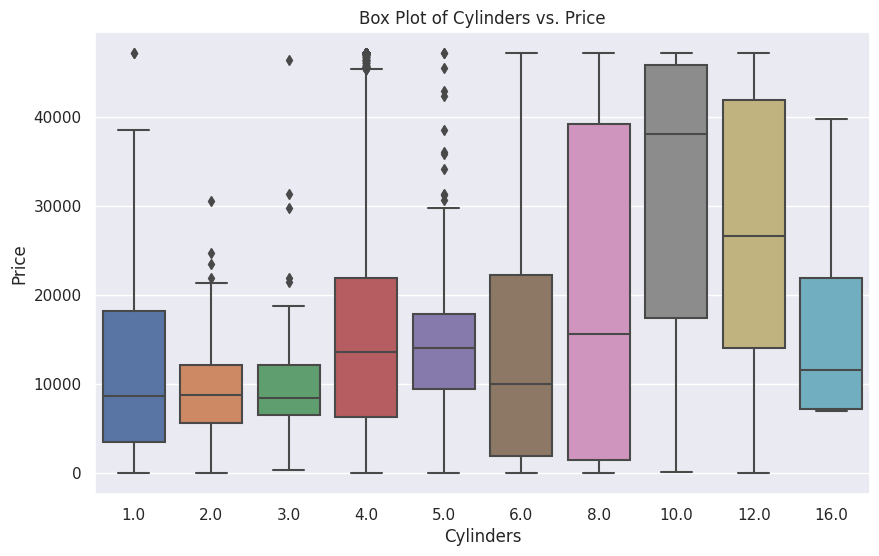

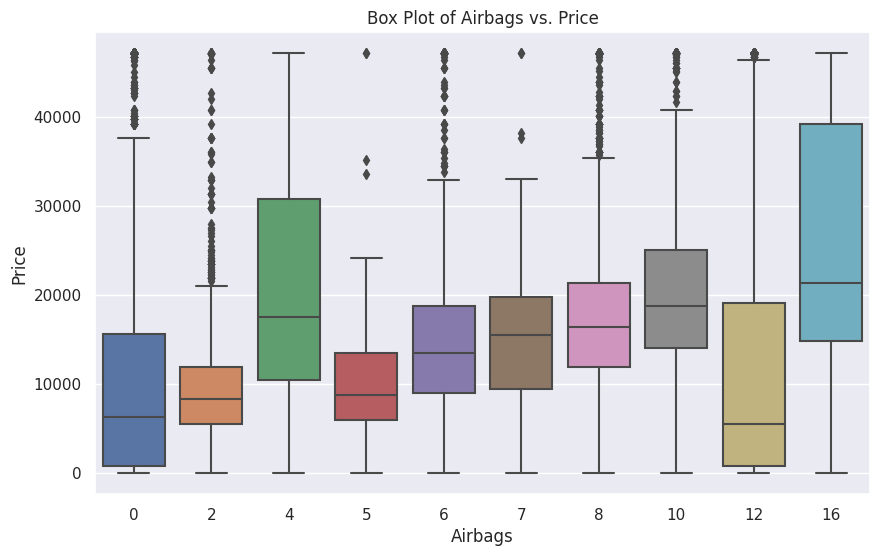

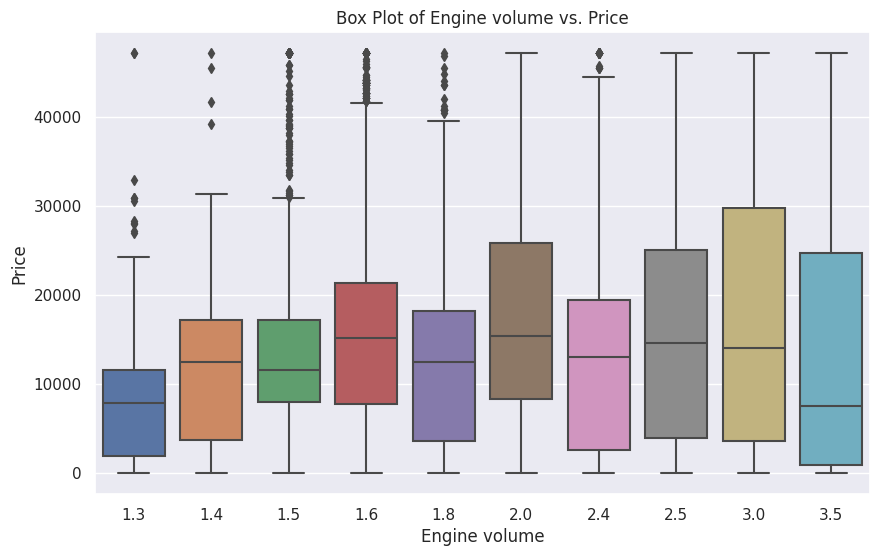

In [29]:
for col in ["Cylinders", "Airbags", "Engine volume"]:
    top_values = df[col].value_counts().index[:10]
    filtered_df = df[df[col].isin(top_values)]
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=filtered_df[col], y=filtered_df["Price"])
    plt.title(f"Box Plot of {col} vs. Price")

# thank you

*You can do future engineering :)*